<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
!pip install html5lib
!pip install bs4
from bs4 import BeautifulSoup 
import requests 
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=a4ab654d9a91a92a39a5a96a5f3d824a5700941678c548e29ee8a63d6e98b266
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data, 'html5lib')

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
df = pd.DataFrame(columns=['Language Name', 'Annual average Salary'])

for row in soup.find("tbody").find_all("tr"):
  col = row.find_all("td")
  language = col[1].text
  salary = col[3].text

  df = df.append({'Language Name' : language, 'Annual average Salary' : salary}, ignore_index=True)

#drop first row
df.drop(index=df.index[0], axis=0, inplace=True)

print(df)

   Language Name Annual average Salary
1         Python              $114,383
2           Java              $101,013
3              R               $92,037
4     Javascript              $110,981
5          Swift              $130,801
6            C++              $113,865
7             C#               $88,726
8            PHP               $84,727
9            SQL               $84,793
10            Go               $94,082


Save the scrapped data into a file named *popular-languages.csv*


In [6]:
# your code goes here
df.to_csv('popular-languages.csv')

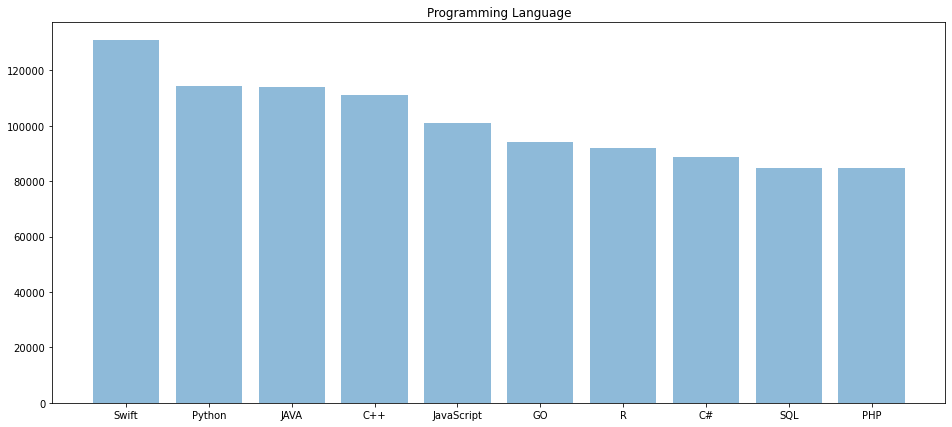

In [7]:
import matplotlib.pyplot as plt
import numpy as np

perfomance = [130801, 114383,113865,110981,101013,94082,92037,88726,84727,84793]
dfs = ['Swift','Python','JAVA','C++','JavaScript','GO','R','C#','SQL','PHP']
tks= np.arange(len(dfs))
plt.figure(figsize=(16,7))
plt.bar(tks, perfomance, align='center',alpha=0.5)
plt.xticks(tks,dfs)
plt.title('Programming Language')
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01).
